In [56]:
import pandas as pd

In [57]:
import numpy as np
import folium
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from folium import plugins


In [95]:
df= pd.read_excel('PK.xlsx')
df

,State/Province,Cases,Deaths,Cured
0,ICT,14884,164,12253
1,Punjab,92073,2116,81260
2,Sindh,118311,2151,107403
3,KPK,33397,1178,27119
4,Bolochistan,11601,136,9976
5,Gilgit Baltistan,1989,48,1566
6,AJK,2034,49,1449


In [96]:
#perday data
PK= pd.read_excel('perDay.xlsx', parse_dates=True, sheet_name= 'PK')
IT= pd.read_excel('perDay.xlsx', parse_dates=True, sheet_name='IT')
IND= pd.read_excel('perDay.xlsx', parse_dates=True, sheet_name='IND')



In [97]:
df['Cases'].sum()
#total cases including 26-27 dates 



274289

In [98]:
df.style.background_gradient(cmap='Reds')

,State/Province,Cases,Deaths,Cured
0,ICT,14884,164,12253
1,Punjab,92073,2116,81260
2,Sindh,118311,2151,107403
3,KPK,33397,1178,27119
4,Bolochistan,11601,136,9976
5,Gilgit Baltistan,1989,48,1566
6,AJK,2034,49,1449


In [99]:
#total active cases in provinces of Pakistan

total_active=  df['Cases']-(df['Cured']+df['Deaths'])
df['total_active']= total_active
tc = df.groupby('State/Province')['total_active'].sum().sort_values(  ascending = False, ).to_frame()
tc.style.background_gradient(cmap='Blues')



,total_active
State/Province,
Sindh,8757
Punjab,8697
KPK,5100
ICT,2467
Bolochistan,1489
AJK,536
Gilgit Baltistan,375


C:\Users\Hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



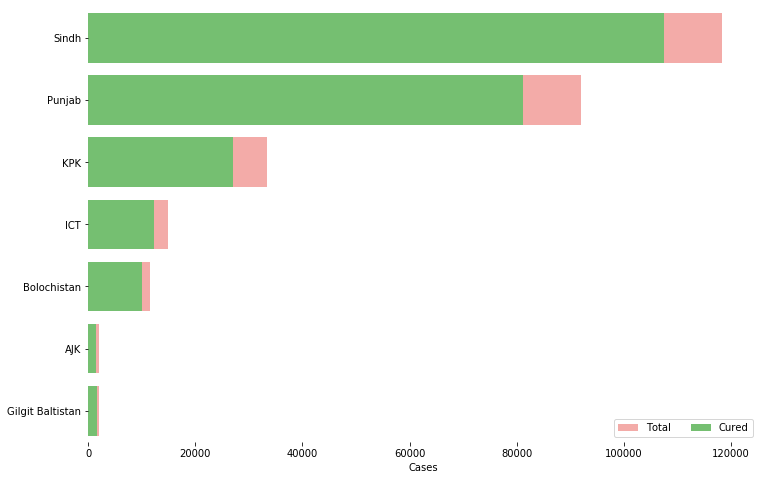

In [65]:
#total cases vs cured

f,ax=plt.subplots(figsize=(12,8))
data= df[['State/Province','Cases','Deaths','Cured']]
data.sort_values('Cases',ascending=False,inplace=True)
sns.set_color_codes('pastel')
sns.barplot(x='Cases',y='State/Province',data=data,label="Total",color="r")
sns.set_color_codes('muted')
sns.barplot(x='Cured',y='State/Province',data=data,label="Cured",color="g")
ax.legend(ncol=2,loc="lower right",frameon=True)
ax.set(xlim=(0,125000),ylabel="",xlabel="Cases")
sns.despine(left=True,bottom=True)

In [66]:
import plotly
plotly.io.rendersdefault='colab'


In [1]:
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(go.Scatter(x=PK['Date'],y=PK["TotalCases"],mode="lines+markers",name="TotalCases"))
fig.update_layout(title_text="trend of covid19 in Pakistan",plot_bgcolor='rgb(230,230,230)')
fig.show()

#dailyCases

import plotly.express as px

fig=px.bar(PK,x="Date",y="NewCases",barmode="group",height=400)
fig.update_layout(title_text="covid19 cases daily basic in Pakistan",plot_bgcolor='rgb(230,230,230)')
fig.show()

NameError: name 'PK' is not defined

In [11]:
#comparing with other c0untries
fig=px.bar(PK,x='Date',y='TotalCases',color='TotalCases',orientation='v',height=600,title="confirmed cases in PK",color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

fig=px.bar(IND,x='Date',y='TotalCases',color='TotalCases',orientation='v',height=600,title="confirmed cases in India",color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

fig=px.bar(IT,x='Date',y='TotalCases',color='TotalCases',orientation='v',height=600,title="confirmed cases in Italy",color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

In [68]:
from plotly.subplots import make_subplots
fig=make_subplots(rows=2,cols=2 ,specs=[[{},{}],[{"colspan":2},None]],subplot_titles=("PK",'IND',"IT"))
fig.add_trace(go.Bar(x=PK['Date'],y=PK['TotalCases'],marker=dict(color=PK["TotalCases"],coloraxis='coloraxis')),1,1)
fig.add_trace(go.Bar(x=IND['Date'],y=IND['TotalCases'],marker=dict(color=IND["TotalCases"],coloraxis='coloraxis')),1,2)
fig.add_trace(go.Bar(x=IT['Date'],y=IT['TotalCases'],marker=dict(color=IT["TotalCases"],coloraxis='coloraxis')),2,1)
fig.update_layout(coloraxis=dict(colorscale="Bluered_r"),showlegend=False,title_text="totalConfirmedCases")
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

In [13]:
#As we can see from the graph the cases india is raising up as its an exponential graph but curve of italy is almost flatend 
#but the curve of pakistan is also on raise but in slow pace.Might be the reason is the cases get reported are less .People are 
#scared to go to the hospitals . 

#after crossing 100
title="main source"
labels=["PK","IND",'IT']
colors=["rgb(122,128,0)","rgb(255,0,0)","rgb(49,130,189)"]
mode_size=[10,10,12]
line_size=[1,1,8]
fig=go.Figure()

fig.add_trace(go.Scatter(x=PK['After'],y=PK['TotalCases'],mode='lines',name=labels[0],line=dict(color=colors[0],width=line_size[0]),connectgaps=True))
fig.add_trace(go.Scatter(x=IND['After'],y=IND['TotalCases'],mode='lines',name=labels[1],line=dict(color=colors[1],width=line_size[1]),connectgaps=True))
fig.add_trace(go.Scatter(x=IT['After'],y=IT['TotalCases'],mode='lines',name=labels[2],line=dict(color=colors[2],width=line_size[2]),connectgaps=True))
annotations=[]
annotations.append(dict(xref='paper',yref='paper',x=0.5,y=0.1,xanchor='center',yanchor='top',text='After100',font=dict(family='Arial',size=12,color='rgb(150,150,150)'),showarrow=False))
fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='TotalCase')
fig.show()

In [22]:
#forecast for Pakistan
from fbprophet import Prophet


In [69]:
PKCon=PK.groupby('Date').sum()['TotalCases'].reset_index()
PKCon.columns=['ds','y']
PKCon['ds']=PKCon['ds'].dt.date

PKCon['ds']=pd.to_datetime(PKCon['ds'])
PKCon.tail()

,ds,y
173,2020-07-21,267428
174,2020-07-22,269191
175,2020-07-23,270400
176,2020-07-24,271887
177,2020-07-25,273113


In [82]:
m=Prophet(interval_width=0.75)
m.fit(PKCon)
future=m.make_future_dataframe(periods=5)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
178,2020-07-26
179,2020-07-27
180,2020-07-28
181,2020-07-29
182,2020-07-30


In [83]:
#prediction
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
178,2020-07-26,288789.109441,285778.713463,291777.732409
179,2020-07-27,291685.282814,288744.739587,294788.793863
180,2020-07-28,294677.437989,291568.578032,297858.275695
181,2020-07-29,297659.939611,294499.375528,300573.135020
182,2020-07-30,300525.615574,297208.683518,303688.527672


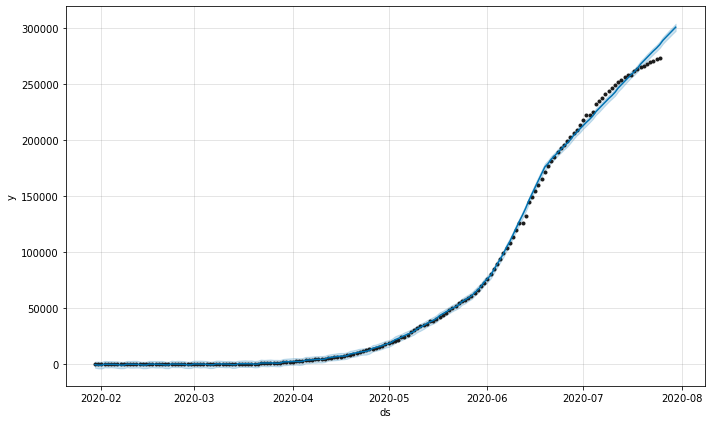

In [84]:
Pk_forecast_plot=m.plot(forecast)

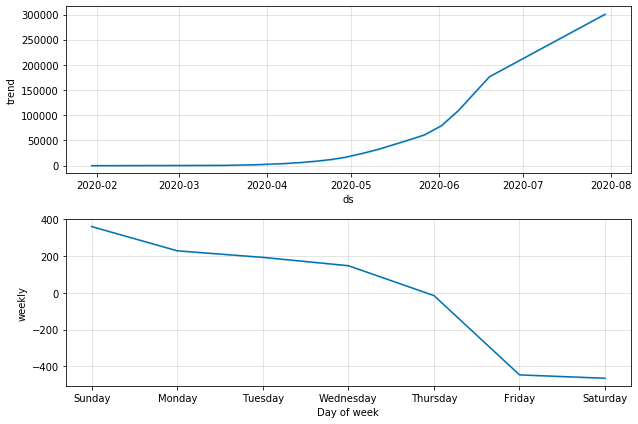

In [85]:
pk_forecast_plot=m.plot_components(forecast)